# Aplicações à Engenharia: Otimização

Neste capítulo, importaremos os seguintes módulos:

In [1]:
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
sy.init_printing()

## Introdução

Problemas de otimização são encontrados em diversas situações da Engenharia, em particular na Engenharia de Produção. Em uma linha de produção, por exemplo, a otimização de custos com logística, recursos humanos, matéria-prima são exemplos de onde podemos empregar métodos computacionais para obter soluções _ótimas_.

Problemas de otimização são comumente tratados como *problemas de minimização*, onde se busca o _mínimo global_ de uma _função objetivo_ (FO) escalar $f(x)$, visto que maximizar $f(x)$ é equivalente a minimizar $-f(x)$. 

Entretanto, esses problemas são acompanhados de _restrições_, que podem ser representadas por uma igualdade ou por uma desigualdade. Quando uma restrição é escrita na forma $g(x) = 0$, dizemos que $g(x)$ é uma _restrição de igualdade_; quando escrita na forma $h(x) \leq 0$, dizemos que $h(x)$ é uma _restrição de desigualdade_.

### Classificação de problemas de otimização

Problemas de otimização (PO) são classificados com base nas propriedades das funções $f(x)$, $g(x)$ e $h(x)$. Em linhas gerais, um PO pode ser:

- _univariado_ (ou _unidimensional_), se $x$ é escalar, i.e. $x \in \mathbb{R}$;
- _multivariado_ (ou _multidimensional_), se $x$ é um vetor, i.e. $x \in \mathbb{R}^n$.
- _linear_: se a FO e as restrições são funções lineares. Neste caso, por razões históricas, diz-se que o problema é de _programação linear_.
- _não-linear_: se a FO e as restrições são funções não-lineares. Neste caso, diz-se que o problema é de _programação não-linear_.

Com respeito às restrições, um PO pode ainda ser:

- _irrestrito_: quando não se assumem limites para os valores de $x$.
- _restrito_: quando limites para os valores de $x$ são impostos.

Aqui trataremos apenas de casos em que $x \in \mathbb{R}$.

### Problemas convexos

Sabe-se que problemas não-lineares são muito mais difíceis de resolver do que problemas lineares porque eles podem admitir uma ampla variedade de comportamentos. Um PO não-linear pode ter tanto _mínimos locais_ quanto _mínimos globais_. Logo, encontrar o _mínimo global_ de uma função $f(x)$ não-linear exige técnicas aperfeiçoadas. 

Neste sentido, uma subclasse de problemas não-lineares que pode ser resolvida eficientemente são os chamados _convexos_. Em problemas convexos, a função $f(x)$ é _convexa_. Mas o que é uma _função convexa_?

Uma função convexa definida em um intervalo $[a,b]$ é aquela em que todos os seus valores estão abaixo da reta secante que passa pelos pontos $(a,f(a))$ e $(b,f(b)$. Isto, por sua vez, garante que ela contenha _somente_ um mínimo global.

**Exemplo**: a função $f(x) = 3x^2 - 0.36x - 11.2$ é convexa em $[-2,3]$.

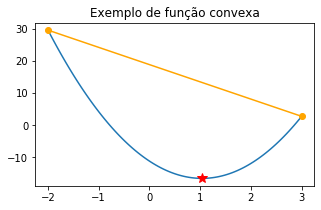

In [2]:
# domínio
a,b = -2,3
x = np.linspace(a,b,100) 

# função e valores nos extremos
f = lambda x: 5*x**2 - 10.36*x - 11.2 
fa,fb = f(a),f(b) 

# reta secante
s = fa + (fb - fa)/(b - a)*(x - a)

# ponto de mínimo: -b/(2a)
xmin = 10.36/10 

# plotagem de funções
plt.figure(figsize=(5,3))
plt.plot(x,f(x))
plt.plot(x,s,color='#ffa500')

# pontos da secante
plt.plot(a,f(a),'o',color='#ffa500')
plt.plot(b,f(b),'o',color='#ffa500')

# ponto de mínimo
plt.plot(xmin,f(xmin),'*r',ms=10);

plt.title('Exemplo de função convexa'); 

**Exemplo**: a função $p(x) = 10x^2\textrm{sen}(6x) - 10.36\exp(x/8) - 11.2$ não é convexa em $[-2,3]$.

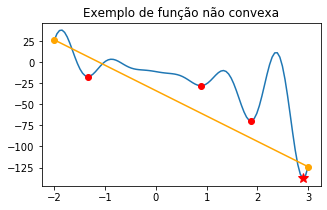

In [3]:
# função
p = lambda x: 10*x**2*np.sin(6*x) - 10.36*x*np.exp(x/8) - 11.2 

# extremos
pa,pb = p(a),p(b)

# secante
t = pa + (pb - pa)/(b - a)*(x - a) 

# plotagem de funções
plt.figure(figsize=(5,3))
plt.plot(x,p(x))
plt.plot(x,t,color='#ffa500')

# pontos da secante
plt.plot(a,p(a),'o',color='#ffa500')
plt.plot(b,p(b),'o',color='#ffa500')

# mínimos locais
xloc = [-1.33868618,0.88811853,1.87451904]

for xl in xloc:
    plt.plot(xl,p(xl),'or');

# mínimo global
xmin2 = 2.90547127

plt.plot(xmin2,p(xmin2),'*r',ms=10);

plt.title('Exemplo de função não convexa'); 

Como vemos acima, a função $p(x)$ admite 3 mínimos locais e um mínimo global. Pense um pouco sobre que estratégia computacional você utilizaria para encontrar os mínimos locais. Mais adiante mostraremos como localizar o mínimo global para funções univariadas contínuas (quando possível).

### Pontos de sela

Como vimos acima, a convexidade de uma função é uma propriedade muito importante para que um mínimo global seja localizado. Como sabemos do Cálculo, pontos de máximo ou mínimo identificam-se como _pontos críticos_ de uma função nos quais a primeira derivada da função se anula.

Casos particulares onde a derivada de uma FO anula-se mas o ponto não pode ser definido como de mínimo ou máximo podem ocorrer. Tais situações implicam a existência dos chamados _pontos de sela_. Uma função com um único ponto de sela, por exemplo, não admitirá mínimo global nem mínimo local. Para testarmos se um ponto crítico é um ponto de sela, devemos verificar o sinal da segunda derivada da função. Uma das seguintes situações deve ser obtida em um ponto crítico $x^*$:

- _ponto de mínimo:_ $f''(x^*) > 0$
- _ponto de máximo:_ $f''(x^*) < 0$
- _ponto de sela:_ $f''(x^*) = 0$

**Exemplo:** qualquer função quadrática admite ou um ponto de mínimo ou de máximo. A função $f(x) = x^3$ possui um ponto de sela em $x^* = 0$.

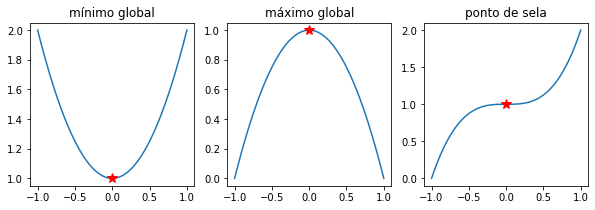

In [4]:
x = np.linspace(-1,1)

plt.figure(figsize=(10,3))

plt.subplot(131)
plt.plot(x,x**2 + 1)
plt.plot(0,1,'r*',ms=10)
plt.title('mínimo global')

plt.subplot(132)
plt.plot(x,-x**2 + 1)
plt.plot(0,1,'r*',ms=10)
plt.title('máximo global')

plt.subplot(133)
plt.plot(x,x**3 + 1)
plt.plot(0,1,'r*',ms=10)
plt.title('ponto de sela');

## Otimização univariada

Como dissemos anteriormente, a otimização univariada visa resolver um problema de minimização tomando uma FO que depende apenas de uma variável. Matematicamente, podemos descrever este problema da seguinte forma:

$$\text{Encontre } x^{*} = \min f(x), \, \text{sujeito a} \, g(x) = 0, h(x) \leq 0.$$

Em geral, $x$ é uma _variável de decisão_, isto é, uma quantidade que pode ser ajustada livremente (ex. comprimentos, áreas, ângulos etc.). 

As técnicas utilizadas para a resolução de um problema desse tipo são baseadas em métodos analíticos (busca pelos zeros das derivadas) ou em métodos computacionais (determinação de raízes por processos iterativos). Métodos chamados de _root finding_ são estudados em um curso introdutório de Métodos Numéricos.

Para dar exemplos com problemas aplicados de otimização univariada, usaremos a abordagem analítica por meio de computação simbólica (módulo `sympy`) e, posteriormente, veremos os métodos `minimize_scalar` e `fminbound` pertencentes ao submódulo `scipy.optimize`.

### Problema resolvido (cilindro)

Consideremos o seguinte problema: minimize a área de um cilindro com volume unitário.

### Resolução 

Em primeiro lugar, escreveremos este problema em linguagem matemática. Sabemos que a área de um cilindro pode ser escrita em termos do raio $r$ e altura $h$ como $2\pi(r^2 + rh)$. O volume, por sua vez, é dado por $\pi r^2h$. A princípio, tanto $r$ quanto $h$ poderiam ser explicitadas como variável dependente. Então, seguiremos os seguintes passos: 

1. Escrevemos uma restrição de igualdade usando $r$ como variável independente para o volume unitário, de maneira que $g(h) = \pi r^2h - 1 = 0$.
2. Resolvemos a equação de restrição algebricamente para obter $h = 1/\pi r^2$.
3. Substituímos a expressão para $h$ na equação da área, de modo que $f(r) = 2\pi(r^2 + rh) = 2\pi(r^2 + 1/r) = 2\pi r^2 + 1/r$.
4. Visto que a restrição já foi inserida no modelo, basta determinarmos o mínimo global $r^{*}$ tal que $r^{*} = \min{f(r)}$.

#### Abordagem analítica

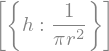

In [5]:
# cria variáveis simbólicas
r,h = sy.symbols('r,h') 

# expressão da área
A = 2*sy.pi*(r**2 + r*h)

# expressão do volume
V = sy.pi*r**2*h

# h_r é uma lista de comprimento 1
h_r = sy.solve(V - 1)
h_r

Devemos acessar o único valor de $h$ por indexação.

In [6]:
h_r = h_r[0]

Agora, substituímos o valor encontrado para $h$ na expressão da área.

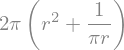

In [7]:
A_r = A.subs(h_r)
A_r

Devemos agora buscar os pontos críticos de $f(r)$, isto é, resolver $\frac{df(r)}{dr}= 0$.

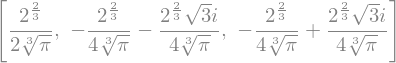

In [8]:
dA_r = sy.solve(A_r.diff(r,set=sy.Reals))
dA_r

Note que entre as solução há valores negativos e complexos que não nos interessam. Escolheremos, então, o valor positivo.

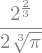

In [9]:
rmin = dA_r[0]
rmin

Finalmente, buscamos o valor numérico da FO neste ponto de mínimo $r^{*}$.

In [10]:
rmin.evalf()

Verificamos que, de fato, este é um ponto de mínimo, avaliando a segunda derivada neste ponto. Esperamos que $\frac{d^2f(r^{*})}{dr^2} > 0$. Com efeito,

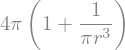

In [11]:
# valor é positivo
d2A_r = A_r.diff(r,2)
d2A_r

Por fim, encontramos o valor da área:

In [12]:
A_r.subs(r,rmin)

Numericamente:

In [13]:
_.evalf(4)

Portanto, a menor área para um cilindro unitário é $A \approx 5.536$.

#### Abordagem computacional

A abordagem analítica que seguimos é viável quando temos de lidar com problemas mais simples. Todavia, a maioria dos problemas de otimização realistas são difíceis de resolver e dependem de técnicas avançadas. 

Mostraremos a seguir que o mesmo PO pode ser resolvido com a ajuda de funções específicas do `scipy.optimize`.

##### Resolução do PO com `optimize.minimize_scalar`

Esta função resolve POs univariados pelo _método de Brent_. Seu principal argumento é:

- `fun`: a função objetivo a ser minimizada
- `bracket`: um intervalo inicial de busca da solução

Vale notar que esta função possui argumentos adicionais que dão especificidade às técnicas implementadas. Entretanto, não discutiremos esses detalhes aqui.

Para resolver o mesmo PO anterior, seguimos os seguintes passos:

1. Definimos a função $f(r)$;
2. Invocamos `optimize.minimize_scalar`.

A seguir, vamos usar uma UDF numérica para $f(r)$.

In [14]:
# função objetivo
def f(r):
    return 2*np.pi*r**2 + 2/r

De posse da função, podemos inseri-la como argumento em `optimize.minimize_scalar`.

In [15]:
# retorna erro de divisão por zero
r_min = optimize.minimize_scalar(f)
r_min

ZeroDivisionError: float division by zero

Note que um erro de divisão por zero ocorre em virtude de haver $r$ no denominador da fração à direita. Em geral, devemos especificar um intervalo de busca razoável para evitar indefinições ocasinadas pela divisão por zero como esta e impedir que o intervalo inicial de busca do valor mínimo seja "livre" demais para o algoritmo. Assim, fazemos uma espécie de limitação do intervalo pela técnica do "confinamento" (_bracketing_).

In [16]:
# bracket pode ser uma tupla ou lista
r_mino = optimize.minimize_scalar(f,bracket=[0.01,2])
r_mino

     fun: 5.535810445932086
    nfev: 18
     nit: 14
 success: True
       x: 0.5419260709360791

O que significa esse resultado?

A variável `r_mino` é um objeto abstrato do tipo `OptimizeResult`.

In [17]:
type(r_mino)

scipy.optimize.optimize.OptimizeResult

Ele nos fornece algumas informações úteis:

- `fun`: o valor da FO no ponto de mínimo
- `x`: o ponto de mínimo encontrado

As demais, `nfev`, `nit` e `success` são informações sobre a execução do algoritmo, a saber, nesta sequência, o número de avaliações da função, número de iterações e status de execução.

Para acessarmos os valores que queremos basta fazer:

In [18]:
r_min2, fr_min2 = r_mino.x, r_mino.fun
print(r_min2,fr_min2)

0.5419260709360791 5.535810445932086


Assim, vemos que tanto o ponto de mínimo $r^{*}$ quanto o valor mínimo da FO, $f(r^{*})$  obtidos por esta técnica são aproximadamente iguais aos encontrados pela abordagem analítica anterior.

##### Resolução do PO com `optimize.fminbound`

Quando queremos resolver um PO em domínio limitado, devemos indicar os limites de aceitabilidade da solução. No exemplo que estamos estudando, não temos interesse em restringir os valores de aceitabilidade do ponto de mínimo. Entretanto, daremos um exemplo sobre como podemos limitar o intervalo de solução deste problema. 

A função `optimize.fminbound` retorna um mínimo para o PO com um domínio "restrito". Note, todavia, que o uso de "restrito" aqui tem um sentido diferente daquele das funções de restrição $g(x)$ e $h(x)$ explicadas acima. 

Os principais argumentos de `optimize.fminbound` são:

- `fun`: a função objetivo;
- `x1`: o limite inferior de aceitabilidade para o ponto de mínimo;
- `x2`: o limite superior de aceitabilidade para o ponto de mínimo;

Haja vista que $f(r)$ já está definida, vamos buscar um mínimo no domínio $r_1 < r < r_2$ e escolhamos, por exemplo, $r_1 = 2.1$ e $r_2 = 3.2$.

In [19]:
optimize.fminbound(f,2.1,3.2)

Vamos realizar um segundo teste, agora considerando $r_1 = 0.5$ e $r_2 = 1.5$.

In [20]:
optimize.fminbound(f,0.5,1.5)

Vamos realizar ainda um terceiro teste considerando $r_1 = 3.0$ e $r_2 = 15.0$.

In [21]:
optimize.fminbound(f,3.0,15.0)

Percebemos que o valor obtido no segundo teste é bastante próximo aos obtidos pelas duas técnicas anteriores, ao passo que os valores obtidos no primeiro e terceiro testes praticamente coincidem com os limites inferiores impostos. Por que isto acontece? Basta analisar o gráfico de $f(r)$!

#### Análise gráfica

Vamos plotar o gráfico de $f(r)$ no intervalo $(0,10)$.

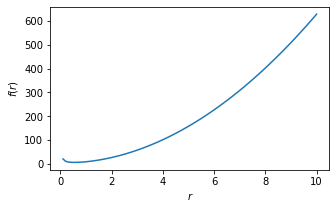

In [22]:
r = np.linspace(0.1,10,100)
plt.figure(figsize=(5,3))
plt.plot(r,f(r))
plt.xlabel('$r$'); plt.ylabel('$f(r)$');

É fácil ver que $f(r) \to \infty$ à medida que $r \to \infty$. Logo, está explicado porque os valores do primeiro e terceiro testes comportam-se daquela maneira.

Agora, plotemos o gráfico de $f(r)$ em um intervalo menor contendo o ponto de mínimo.

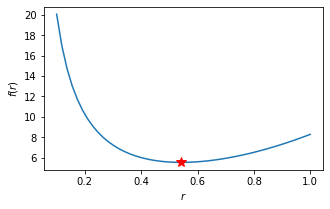

In [23]:
r = np.linspace(0.1,1,50)
plt.figure(figsize=(5,3))
plt.plot(r,f(r)); plt.plot(rmin,f(rmin),'r*',ms=10)
plt.xlabel('$r$'); plt.ylabel('$f(r)$');

Com este gráfico, vemos que o valor do segundo teste é consistente com aqueles encontrados por meio da técnica analítica e pela função `optimize.minimize_scalar`. Em outras palavras, neste caso, tanto esta função quanto `optimize.fminbound` retornam praticamente o mesmo valor. Todavia, não será este o caso se a função objetivo apresentar comportamento não monotônico em subintervalos de seu domínio.

#### Conclusão

Concluímos que o ponto de mínimo ocorre em $r^{*} \approx 0.54$, e que $f(r^{*}) \approx 5.54$. Estes são valores aproximados independentemente da técnica utilizada anteriormente. 

Em termos práticos, a menor área que podemos obter para um cilindro de 1 metro cúbico, por exemplo, é $A \approx 5.54 \, m^2$ com raio medindo aproximadamente $54 \, cm$.